# SEAM CARVING ALGORITHM                         
-------------------------------------------------------------------------------------------------------------------

## <span style="color:brown">ENERGY CALCULATION</span>

In [10]:
@jit
def energy_calculation(image):
    
    n=len(image) # n stores the number of rows of the image
    m=len(image[0]) # m stores the number of cols of the image
    #energy_matrix=[[(0)]*m]*n
    energy_matrix = [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            
            # r,g,b values for i,j cell
            a=image[i][j][0]
            b=image[i][j][1]
            c=image[i][j][2]
            
            #print(a,b,c)
            ans=0
            
            if i-1>=0:
                
                # r,g,b values for i-1,j cell
                d=image[i-1][j][0]
                e=image[i-1][j][1]
                f=image[i-1][j][2]
                ans+=(a-d)*(a-d)+(b-e)*(b-e)+(c-f)*(c-f)
            
            if i+1<n:
    
                # r,g,b values for i+1,j cell
                d=image[i+1][j][0]
                e=image[i+1][j][1]
                f=image[i+1][j][2]
                ans+=(a-d)*(a-d)+(b-e)*(b-e)+(c-f)*(c-f)
                
            if j-1>=0:
                
                # r,g,b values for i,j-1 cell
                d=image[i][j-1][0]
                e=image[i][j-1][1]
                f=image[i][j-1][2]
                ans+=(a-d)*(a-d)+(b-e)*(b-e)+(c-f)*(c-f)
                
            if j+1<m:
                
                # r,g,b values for i,j+1 cell
                d=image[i][j+1][0]
                e=image[i][j+1][1]
                f=image[i][j+1][2]
                ans+=(a-d)*(a-d)+(b-e)*(b-e)+(c-f)*(c-f)
                
            energy_matrix[i][j]=ans
#     for i in range(n):
#         for j in range(m):
#             print(energy_matrix[i][j],end=" ")
#         print("\n")
    return energy_matrix
    

## <span style="color:brown">FUNCTION TO IDENTIFY SEAM</span>

In [11]:
@jit#(nopython=True)
def seam_identification(energy_matrix):
    
    # We first need to find the dp matrix
    n=len(energy_matrix)
    m=len(energy_matrix[0])
    dp = [[[0 for k in range(3)] for j in range(m)] for i in range(n)] # dp matrix of size n*m*3
    for i in range(n-1,-1,-1):
        for j in range(m):
            
            if i+1<n:
                
                mini=dp[i+1][j][0]
                x=i+1
                y=j
                if j-1>=0:
                    if dp[i+1][j-1][0]<mini:
                        y=j-1
                        mini=dp[i+1][j-1][0]
                if j+1<m:
                    if dp[i+1][j+1][0]<mini:
                        y=j+1
                        mini=dp[i+1][j+1][0]
                dp[i][j][0]=energy_matrix[i][j]+mini
                dp[i][j][1]=x
                dp[i][j][2]=y
            
            else:
                dp[i][j][0]=energy_matrix[i][j]
                dp[i][j][1]=-1
                dp[i][j][2]=-1
    
    # Now that we have the dp matrix, we need to find the seam corresponding to the least energy
    seam_list = [[0 for i in range(2)] for j in range(n)] # 2D array of size n*2 to store seam path
    mini=dp[0][0][0]
    ind=0
    for i in range(m):
        if dp[0][i][0]<mini:
            mini=dp[0][i][0]
            ind=i
    # We have the starting index `ind` where the seam starts
    seam_list[0][0]=0
    seam_list[0][1]=ind
    for i in range(1,n):
        x=seam_list[i-1][0]
        y=seam_list[i-1][1]
        seam_list[i][0]=dp[x][y][1]
        seam_list[i][1]=dp[x][y][2]
        #print(seam_list[i][0],seam_list[i][1])
    return seam_list
    
    

## <span style="color:brown">SEAM REMOVAL FUNCTION</span>

In [12]:
@jit
def seam_removal(image,seam_list):
    n=len(image)
    m=len(image[0])
    new_image = [[[0 for k in range(3)] for i in range(m - 1)] for j in range(n)]
    for i in range(n):
        count=0
        for j in range(m):
            if seam_list[i][1]==j:
                continue
            else:
                new_image[i][count][0]=image[i][j][0]
                new_image[i][count][1]=image[i][j][1]
                new_image[i][count][2]=image[i][j][2]
                count=count+1
    return new_image

In [13]:
@jit
def convert_to_64_int(img):
    n = len(img)
    m = len(img[0])
    converted = [[[0 for k in range(3)] for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            converted[i][j] = [np.dtype('int64').type(img[i][j][0]),np.dtype('int64').type(img[i][j][1]),np.dtype('int64').type(img[i][j][2])]
    return converted

## <span style="color:brown">MAIN FUNCTION TO HANDLE ALL THE FUNCTION CALLS</span>

In [5]:
#@jit(nopython=True)
def seam_carving(image,number):
    
    # We need to remove `number` no of vertical seams from the image `image`
    # So we will run a loop over image `number` times and carve that number of seams out of the image.
    image = np.array(image)
    image = convert_to_64_int(image)
    for i in range(number):
        
        image=np.array(image)
        # Now when we want to remove a seam, first we need to have the energy matrix
        #t0=time.perf_counter()
        energy_matrix=energy_calculation(image)
        #t1=time.perf_counter()
        #print(f"It took {t1 - t0:0.4f} seconds for energy function")
        
        # Now we have the energy matrix, we proceed to find the seam with the least energy
        # This includes two steps, 1) Finding the dp matrix 2) Seam Identification
        # seam_list stores all the cells that are part of the current seam with least energy
        #t2=time.perf_counter()
        energy_matrix=np.array(energy_matrix)
        seam_list=seam_identification(energy_matrix)
        #t3=time.perf_counter()
        #print(f"It took {t3 - t2:0.4f} seconds for seam identification function")
        
        # To visualize where the seam is Mark all the seam cells with some color and --
        # --print the image just to identify where the seam is
#         n=len(image)
#         m=len(image[0])
#         for j in range(n):
#             x=seam_list[j][0]
#             y=seam_list[j][1]
#             #print(x,y)
#             #image[x][y]=[5, 61, 245]
#             image[x][y][0]=255
#             image[x][y][1]=255
#             image[x][y][2]=255
#         print("Modified dimensions are : ",len(image),"X",len(image[0]))
#         print("\n Modified image after number of seam removals = ",i)
#         plt.imshow(image)
#         plt.show()
        
        # Now we have seam_list which stores all the cells to be removed from the image, so we proceed to removing
        #t4=time.perf_counter()
        seam_list=np.array(seam_list)
        image=seam_removal(image,seam_list)
        #t5=time.perf_counter()
        #print(f"It took {t5 - t4:0.4f} seconds for seam removal function\n")
        
        # Now everything is good!. `image` is now updated with the least energy seam getting removed.
    return image

In [14]:
@jit
def transpose_matrix(image):
    img = [[image[k][i] for k in range(len(image))] for i in range(len(image[0]))]
    return img

## <span style="color:brown">IMPORTING LIBRARIES </span>
#### Here we import all the important libraries such as `cv2`, `numpy`, `matplotlib` to read and write images to the output

for  images/cat.jpg

 Original image :


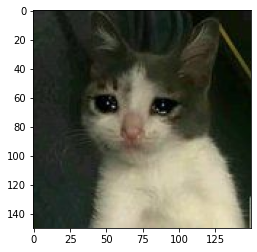


Time for 20%:1.2851s 

 Final image :


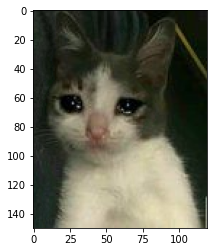

----------------------------------------------------------------------------------------------

Time for 40%:2.6323s 

 Final image :


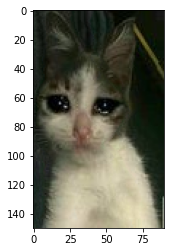

----------------------------------------------------------------------------------------------

Time for 60%:3.9397s 

 Final image :


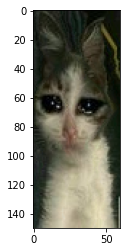

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/bangalore-dancers.jpg

 Original image :


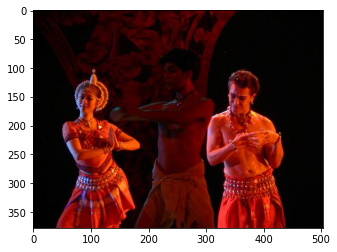


Time for 20%:38.6168s 

 Final image :


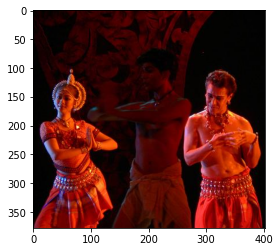

----------------------------------------------------------------------------------------------

Time for 40%:65.6685s 

 Final image :


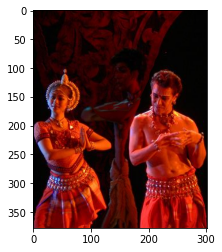

----------------------------------------------------------------------------------------------

Time for 60%:86.5757s 

 Final image :


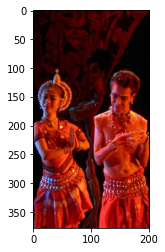

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/path.jpg

 Original image :


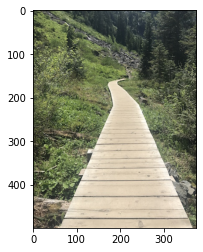


Time for 20%:35.9918s 

 Final image :


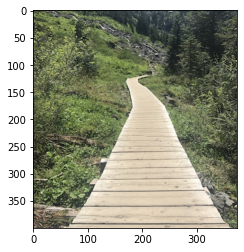

----------------------------------------------------------------------------------------------

Time for 40%:67.7702s 

 Final image :


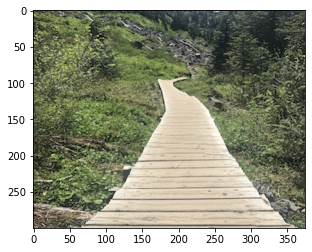

----------------------------------------------------------------------------------------------

Time for 60%:89.9879s 

 Final image :


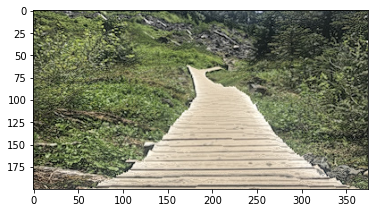

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/shadow.jpg

 Original image :


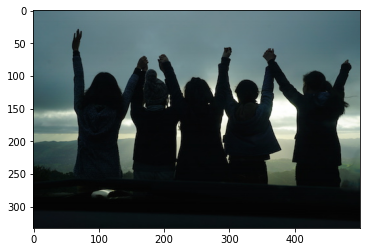


Time for 20%:31.3617s 

 Final image :


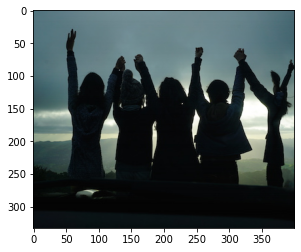

----------------------------------------------------------------------------------------------

Time for 40%:55.8142s 

 Final image :


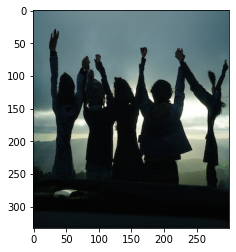

----------------------------------------------------------------------------------------------

Time for 60%:83.0084s 

 Final image :


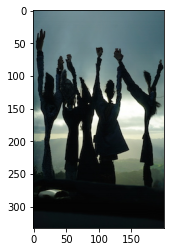

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/tanjore.jpg

 Original image :


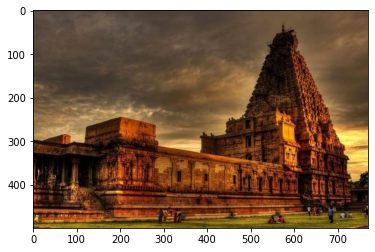


Time for 20%:111.0280s 

 Final image :


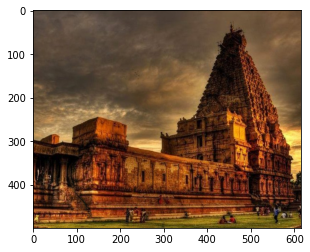

----------------------------------------------------------------------------------------------

Time for 40%:182.2434s 

 Final image :


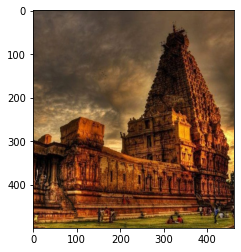

----------------------------------------------------------------------------------------------

Time for 60%:247.4699s 

 Final image :


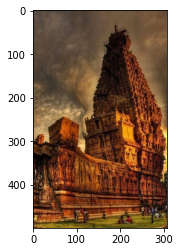

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/trafalgar-square.jpg

 Original image :


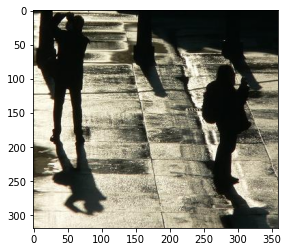


Time for 20%:15.3854s 

 Final image :


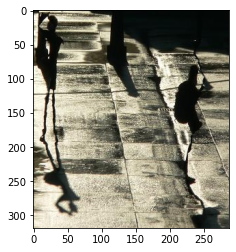

----------------------------------------------------------------------------------------------

Time for 40%:28.2839s 

 Final image :


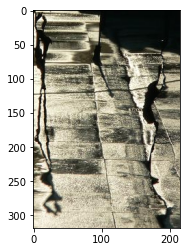

----------------------------------------------------------------------------------------------

Time for 60%:37.7615s 

 Final image :


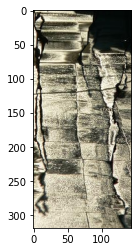

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/uluru.jpg

 Original image :


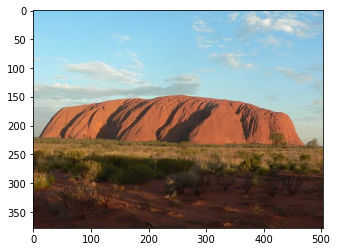


Time for 20%:39.2385s 

 Final image :


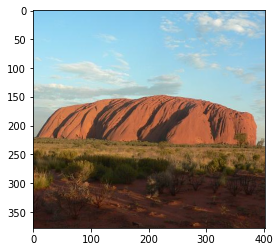

----------------------------------------------------------------------------------------------

Time for 40%:73.7684s 

 Final image :


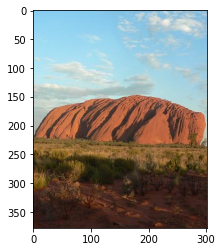

----------------------------------------------------------------------------------------------

Time for 60%:87.2013s 

 Final image :


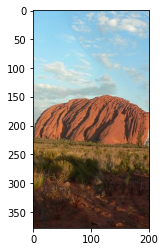

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/iiit.jpg

 Original image :


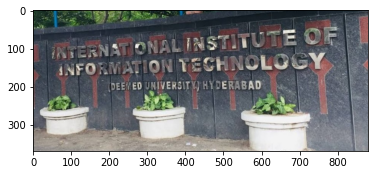


Time for 20%:110.1405s 

 Final image :


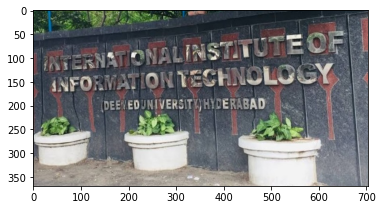

----------------------------------------------------------------------------------------------

Time for 40%:183.9835s 

 Final image :


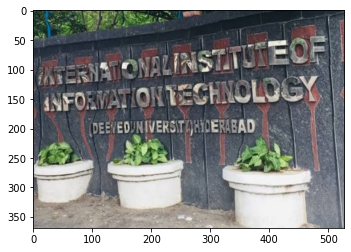

----------------------------------------------------------------------------------------------

Time for 60%:245.5927s 

 Final image :


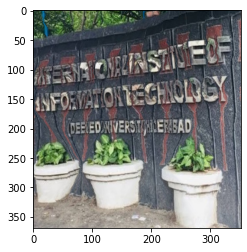

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************
for  images/chhota-bheem.jpeg

 Original image :


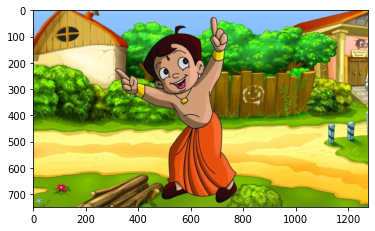


Time for 20%:420.5462s 

 Final image :


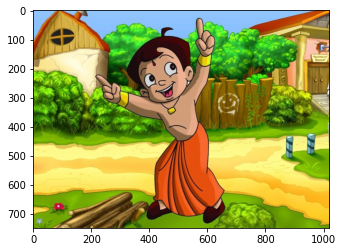

----------------------------------------------------------------------------------------------

Time for 40%:697.8491s 

 Final image :


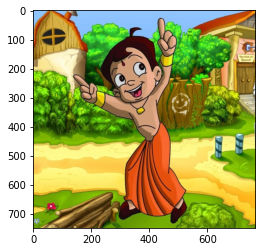

----------------------------------------------------------------------------------------------

Time for 60%:913.6417s 

 Final image :


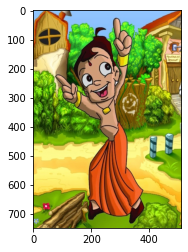

----------------------------------------------------------------------------------------------
***************************************************************************************************
***************************************************************************************************


In [21]:
#Importing open cv library
import cv2
import time
from numba import jit

# Importing numpy library as np
import numpy as np

# Matplotlib is used to plot the various input and output relations
import matplotlib.pyplot as plt
images=['images/cat.jpg','images/bangalore-dancers.jpg','images/path.jpg','images/shadow.jpg','images/tanjore.jpg','images/trafalgar-square.jpg','images/uluru.jpg','images/iiit.jpg','images/chhota-bheem.jpeg']
for i in range(9):

    # print("\n Original dimensions of the picture : ",len(image),"X",len(image[0]))
    
    print("for ", images[i])
    image=cv2.imread(images[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print("\n Original image :")
    plt.imshow(image)
    plt.show()
    
    if i==2:
        image=np.array(image)
        image=transpose_matrix(image)
        
    
    for j in range(1,4):

        # Function call to main funtion which handles the main program
        start_time=time.perf_counter()
        temp=seam_carving(image,round(0.2*j*len(image[0])))
        end_time=time.perf_counter()
        
        if i==2:
            temp=np.array(temp)
            temp=transpose_matrix(temp)
        
        print(f"\nTime for {20*j}%:{end_time - start_time:0.4f}s",end=" ")
        #Final Image is 
        print("\n\n Final image :")
        plt.imshow(temp)
        plt.show()
        print("----------------------------------------------------------------------------------------------")
        
    print("***************************************************************************************************")
    print("***************************************************************************************************")
    #energy_matrix=energy_calculation(image)
    # n=len(energy_matrix)
    # m=len(energy_matrix[0])
    # for i in range(n):
    #     for j in range(m):
    #         print(energy_matrix[i][j],end=" ")
    #     print("\n")

